In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts

sns.set_palette('colorblind')
sns.set_style('white') 
palette = sns.color_palette('colorblind', 6)

In [85]:
# Read .csv files
norm_data = pd.read_csv('/Users/tk/Desktop/Research-CITS5014/csv/norm_data.csv')
meta_data = pd.read_csv('/Users/tk/Desktop/Research-CITS5014/csv/meta_data.csv')

norm_data.set_index(norm_data.columns[0], inplace=True)
norm_data.index.name = None
norm_data.columns = norm_data.columns.astype(int)

# Creat mapping dictionary
key_to_time = meta_data.set_index('sample_id_key')['survival_time'].to_dict()
key_to_time = {int(key): int(value) for key, value in key_to_time.items()}
key_to_status = meta_data.set_index('sample_id_key')['status'].to_dict()
key_to_subtype = meta_data.set_index('sample_id_key')['subtype'].to_dict()

# Create a dictionary to for gene id
gene_id = norm_data.index
gene_to_index = {gene: idx for idx, gene in enumerate(gene_id)}

In [86]:
df_with_subtype = pd.read_csv('/Users/tk/Desktop/gene_project/norm_pam50.csv', sep=',', index_col=0)
df_with_subtype.index.name = None

# Get survival time, status, and subtype from the dataframe
survival_time = pd.to_numeric(df_with_subtype.iloc[-3].values, errors='coerce')
status = pd.to_numeric(df_with_subtype.iloc[-2].values, errors='coerce')
subtypes = df_with_subtype.iloc[-1].values

/var/folders/nn/n9lqp7fs1pq402h_v1c984h40000gn/T/ipykernel_59813/3159216698.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

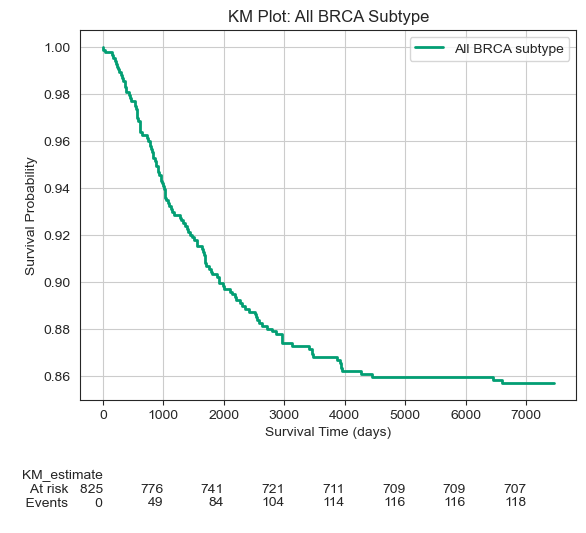

In [87]:
# Fit KaplanMeierFitter
kmf_1 = KaplanMeierFitter()
kmf_1.fit(survival_time, status)

# Create a plot
ax = kmf_1.plot_survival_function(ci_show=False, linewidth=2, color=sns.color_palette('colorblind')[2], label="All BRCA subtype")
add_at_risk_counts(kmf_1, ax=ax, rows_to_show=['At risk', 'Events'])
ax.set_title("KM Plot: All BRCA Subtype")
ax.set_xlabel("Survival Time (days)")
ax.set_ylabel("Survival Probability")
ax.grid()

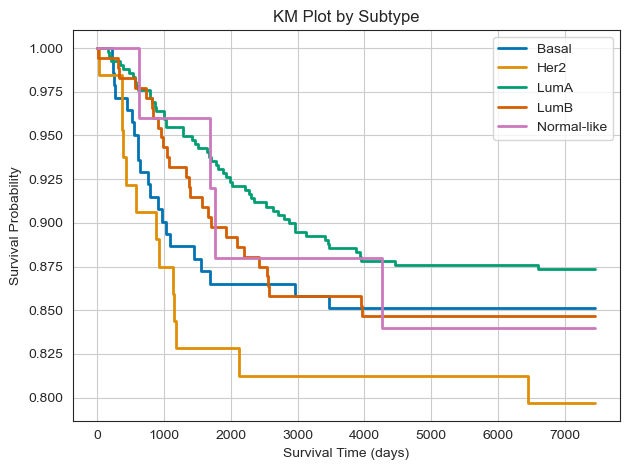

In [89]:
subtype = np.unique(subtypes)

kmf_list = []
# Loop through each subtype
for i, s in enumerate(subtype):
    # Filter data for the current subtype
    mask = subtypes == s
    time = survival_time[mask]
    event = status[mask]
    
    # Fit KaplanMeierFitter
    kmf = KaplanMeierFitter()
    kmf.fit(time, event, label=s)
    kmf_list.append(kmf)
    
    # Plot survival function for each subtype
    ax = kmf.plot_survival_function(ci_show=False, linewidth=2, 
                                    color=sns.color_palette('colorblind')[i % 7])  # To cycle through colors

# Customizing the plot
ax.set_title("KM Plot by Subtype")
ax.set_xlabel("Survival Time (days)")
ax.set_ylabel("Survival Probability")
ax.grid()
plt.tight_layout()
plt.show()

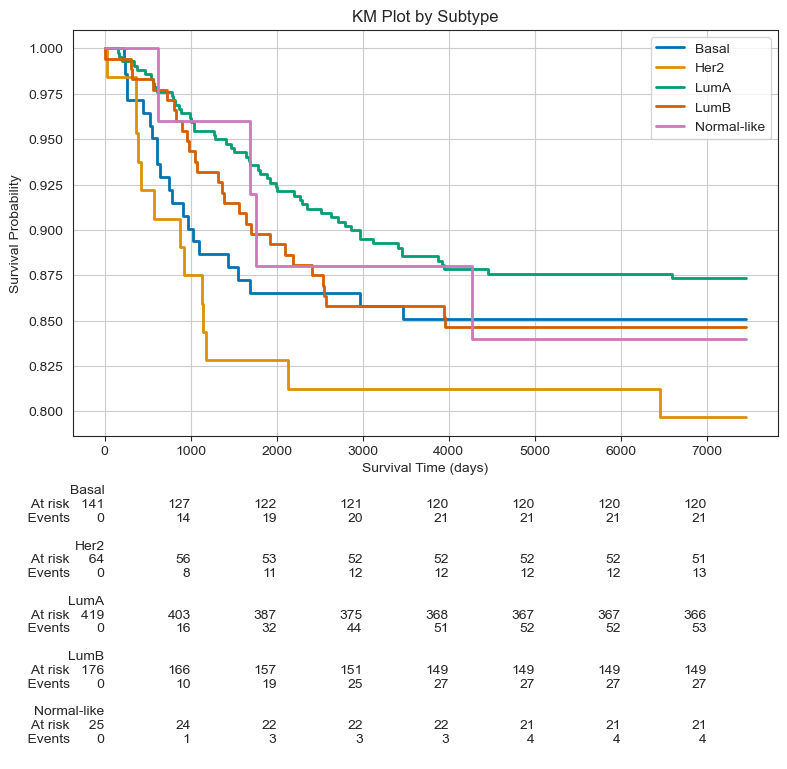

In [83]:
plt.figure(figsize=(8, 8))
subtype = np.unique(subtypes)

kmf_list = []
# Loop through each subtype
for i, s in enumerate(subtype):
    # Filter data for the current subtype
    mask = subtypes == s
    time = survival_time[mask]
    event = status[mask]
    
    # Fit KaplanMeierFitter
    kmf = KaplanMeierFitter()
    kmf.fit(time, event, label=s)
    kmf_list.append(kmf)
    
    # Plot survival function for each subtype
    ax = kmf.plot_survival_function(ci_show=False, linewidth=2, 
                                    color=sns.color_palette('colorblind')[i % 7])  # To cycle through colors

# Add at-risk counts for each subtype
add_at_risk_counts(*kmf_list, ax=ax, rows_to_show=['At risk', 'Events'])

# Customizing the plot
ax.set_title("KM Plot by Subtype")
ax.set_xlabel("Survival Time (days)")
ax.set_ylabel("Survival Probability")
ax.grid()
plt.tight_layout()
plt.show()

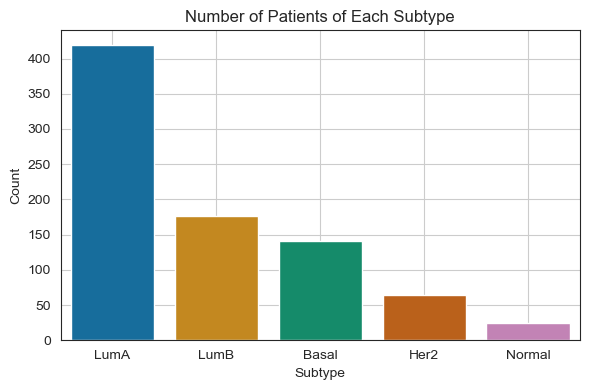

In [74]:
# Count the occurrences of each subtype
subtype_counts = meta_data['subtype'].value_counts().reset_index()
subtype_counts.columns = ['subtype', 'count']

# Create the bar plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='subtype', y='count', data=subtype_counts)
plt.title('Number of Patients of Each Subtype')
plt.xlabel('Subtype')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add the count numbers on top of each bar
# for p in ax.patches:
#     ax.annotate(f'{int(p.get_height())}', 
#                 (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha='center', va='bottom')

plt.tight_layout()
plt.grid()
plt.show()

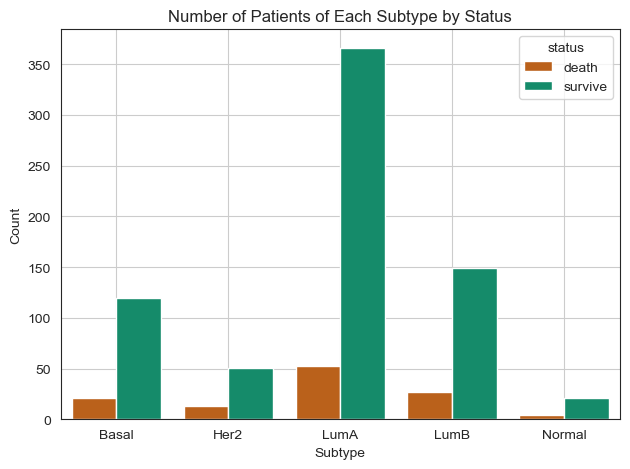

In [75]:
# Map integers to strings
status_mapping = {0: 'death', 1: 'survive'}
meta_data['status'] = meta_data['status'].map(status_mapping)

# Create a DataFrame to count occurrences of each status within each subtype
status_counts = meta_data.groupby(['subtype', 'status']).size().reset_index(name='count')

sns.barplot(x='subtype', y='count', hue='status', data=status_counts, palette=[palette[3], palette[2]])

plt.title('Number of Patients of Each Subtype by Status')
plt.xlabel('Subtype')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add the count numbers on top of each bar segment
# for p in plt.gca().patches:
#     plt.annotate(f'{int(p.get_height())}', 
#                  (p.get_x() + p.get_width() / 2., p.get_height()), 
#                  ha='center', va='bottom')

plt.tight_layout()
plt.grid()
plt.show()

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


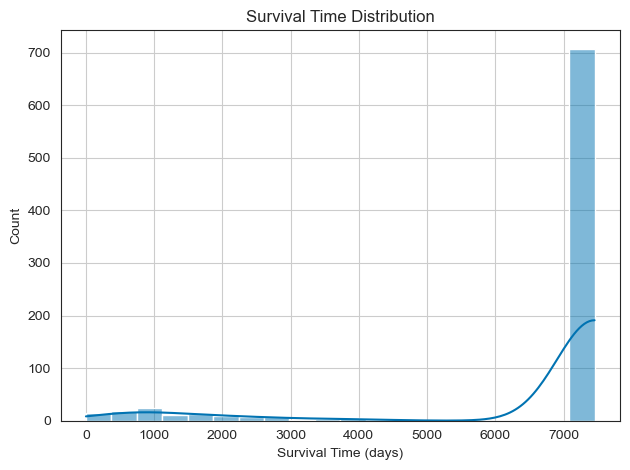

In [76]:
sns.histplot(meta_data['survival_time'], bins=20, kde=True)
plt.title('Survival Time Distribution')
plt.xlabel('Survival Time (days)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tk/opt/anaconda3/envs/gene/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

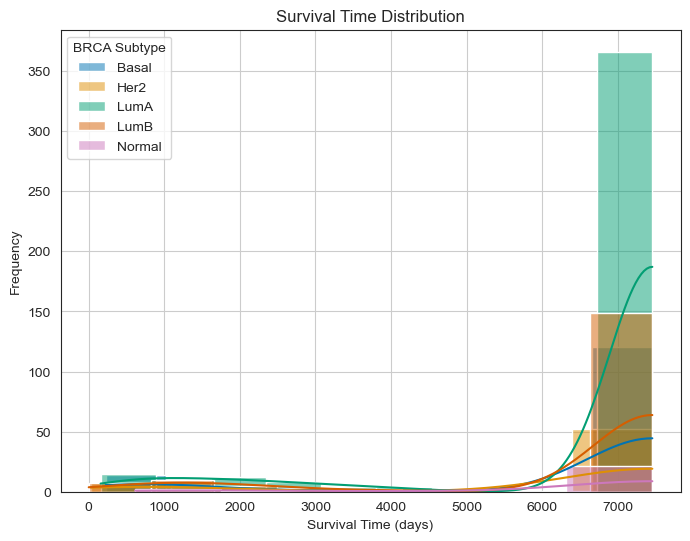

In [77]:
df = meta_data.iloc[:, [1,5]].sort_values(by='subtype')
grouped = df.groupby('subtype')

# Create a single plot
fig, ax = plt.subplots(figsize=(8, 6))  # Only 1 axis

# Plot the survival time distribution for each subtype
for name, group in grouped:
    sns.histplot(group['survival_time'], kde=True, label=name, ax=ax)

# Set plot labels and title
ax.set_title('Survival Time Distribution')
ax.set_xlabel('Survival Time (days)')
ax.set_ylabel('Frequency')
ax.legend(title='BRCA Subtype')
ax.grid()

plt.show()